In [32]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
im = []
# read images from a file into a image object 
img_files = ['plantA_39.jpg','plantB_26.jpg','plantC_15.jpg','plantA_23.jpg','plantB_51.jpg','plantC_44.jpg']
for i in range(6):
    im.append(imageio.imread(img_files[i]))

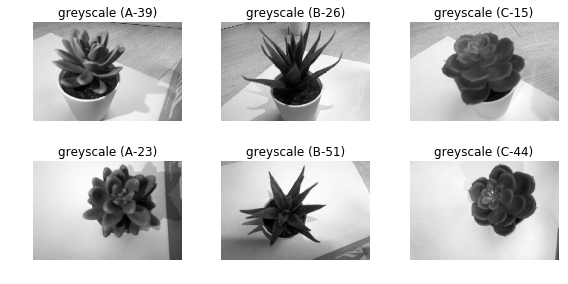

(480, 720)


In [36]:
# generate a greyscale version of each image
grayscale = []
for i in range(6):
    grayscale.append(rgb2gray(im[i]))

fig, axes = plt.subplots(2, 3, figsize=(8, 4))
ax = axes.ravel()
for i in range(6):
    ax[i].imshow(grayscale[i], cmap=plt.cm.gray),ax[i].axis('off')

ax[0].set_title('greyscale (A-39)')
ax[1].set_title('greyscale (B-26)')
ax[2].set_title('greyscale (C-15)')
ax[3].set_title('greyscale (A-23)')
ax[4].set_title('greyscale (B-51)')
ax[5].set_title('greyscale (C-44)')

plt.savefig( 'greyscale.png' )
fig.tight_layout()
plt.show()



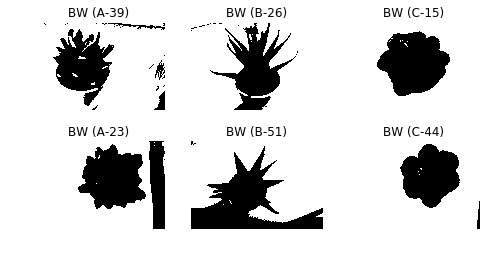

(480, 720)


In [38]:
# convert grayscale to binary image
from skimage.filters import threshold_otsu
thresh = []
binary = []
fig, axes = plt.subplots(2, 3, figsize=(8, 4))
ax = axes.ravel()

for i in range(6):
    thresh.append(threshold_otsu(grayscale[i]))
    binary.append(grayscale[i] > thresh[i])
    ax[i].imshow(binary[i], cmap=plt.cm.gray),ax[i].axis('off'),

ax[0].set_title('BW (A-39)')
ax[1].set_title('BW (B-26)')
ax[2].set_title('BW (C-15)')
ax[3].set_title('BW (A-23)')
ax[4].set_title('BW (B-51)')
ax[5].set_title('BW (C-44)')

plt.savefig( 'BW.png' )
plt.show()


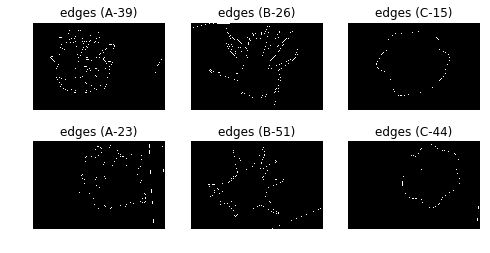

In [39]:
# detect edges in each image

import numpy as np
from matplotlib import pyplot as plt
from skimage import feature

edges = []
fig, axes = plt.subplots(2, 3, figsize=(8, 4))
ax = axes.ravel()


for i in range(6):
    edges.append(feature.canny(grayscale[i], sigma=3))
    ax[i].imshow(edges[i],cmap = plt.cm.gray),ax[i].axis('off'),

    
ax[0].set_title('edges (A-39)')
ax[1].set_title('edges (B-26)')
ax[2].set_title('edges (C-15)')
ax[3].set_title('edges (A-23)')
ax[4].set_title('edges (B-51)')
ax[5].set_title('edges (C-44)')

plt.savefig( 'edges.png' )
plt.show()

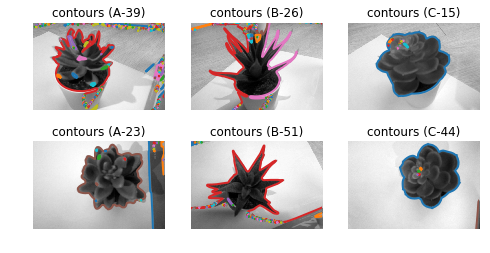

(480, 720)


In [40]:
# detect contours in each image

# find a good value for thresholding
import skimage.color as color 
import skimage.filters as filters 
import skimage.measure as measure
import matplotlib.pyplot as plt

threshold = []
contours = []

fig, axes = plt.subplots(2, 3, figsize=(8, 4))
ax = axes.ravel()

for i in range(6):
    threshold.append(filters.threshold_otsu(grayscale[i]) )
    # Find contours at threshold value found above
    contours.append(measure.find_contours(grayscale[i], threshold[i]))
    ax[i].imshow(grayscale[i], cmap=plt.cm.gray)
    for n, contour in enumerate(contours[i]):
        ax[i].plot(contour[:, 1], contour[:, 0], linewidth=2)
    ax[i].axis('image'),ax[i].axis('off')

# Display the image and plot all contours found

ax[0].set_title('contours (A-39)')
ax[1].set_title('contours (B-26)')
ax[2].set_title('contours (C-15)')
ax[3].set_title('contours (A-23)')
ax[4].set_title('contours (B-51)')
ax[5].set_title('contours (C-44)')
plt.savefig( 'contours.png' )
plt.show()


(720,)


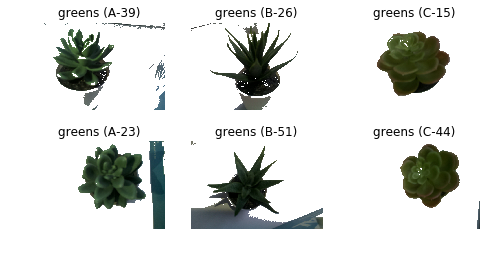

In [41]:
import imageio
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.color import rgb2hsv
from skimage import feature 
from skimage import transform
from skimage.filters import threshold_otsu
from skimage import restoration
import numpy as np


fig, axes = plt.subplots(2, 3, figsize=(8, 4))
ax = axes.ravel()

for i in range(6):
    # convert to greyscale
    grayscale = rgb2gray(im[i])
    # convert to hsv
    hsv_img = rgb2hsv(im[i])
    
    # generate the white background
    img_255 = np.ones_like(im[0], np.uint8)* 255
    
    ## generate the filter 
    # green filter
    test0 = (hsv_img[:,:,0]>0)*(hsv_img[:,:,0]<1)
    test00 = np.dstack((test0,test0,test0))
    # threshold 
    thresh = threshold_otsu(grayscale)
    test1 = (grayscale<thresh)
    test11 = np.dstack((test1,test1,test1))
    
    # filter the background
    test_background = np.logical_not(test00*test11)
    
    # integrate the pic
    img_obj = im[i] * test00 * test11
    img_background = img_255*test_background
    imgg = img_obj + img_background
    ax[i].imshow(imgg)
    ax[i].axis('off')

    
ax[0].set_title('greens (A-39)')
ax[1].set_title('greens (B-26)')
ax[2].set_title('greens (C-15)')
ax[3].set_title('greens (A-23)')
ax[4].set_title('greens (B-51)')
ax[5].set_title('greens (C-44)')

plt.savefig( 'greens.png' )


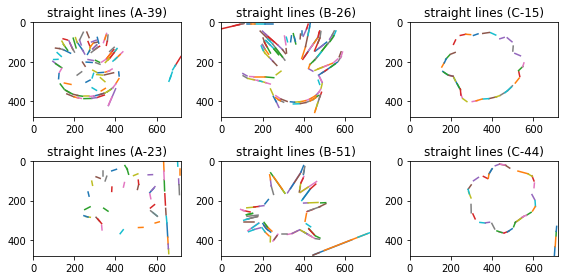

In [44]:
# detect the straight lines in each image 
import numpy as np
import imageio
import matplotlib.pyplot as plt
import skimage.color as color 
import skimage.feature as feature
import skimage.transform as transform

fig, axes = plt.subplots(2, 3, figsize=(8, 4))
ax = axes.ravel()

grayscale = []

for i in range(6):
    grayscale.append(rgb2gray(im[i]))
    # apply classic straight-line Hough transform on the Canny edges
    lines = transform.probabilistic_hough_line(edges[i], threshold = 10, line_length = 20,line_gap = 3 )
    # plot the lines
    for line in lines:
        p0, p1 = line 
        ax[i].plot((p0[0],p1[0]),(p0[1],p1[1])),

    ax[i].set_xlim(( 0, grayscale[i].shape[1]))
    ax[i].set_ylim(( grayscale[i].shape[0], 0 )),    

# set titles for each images
ax[0].set_title('straight lines (A-39)')
ax[1].set_title('straight lines (B-26)')   
ax[2].set_title('straight lines (C-15)')   
ax[3].set_title('straight lines (A-23)')   
ax[4].set_title('straight lines (B-51)')       
ax[5].set_title('straight lines (C-44)')

fig.tight_layout()
plt.savefig( 'straightLine.png' )
plt.show()

(480, 720)


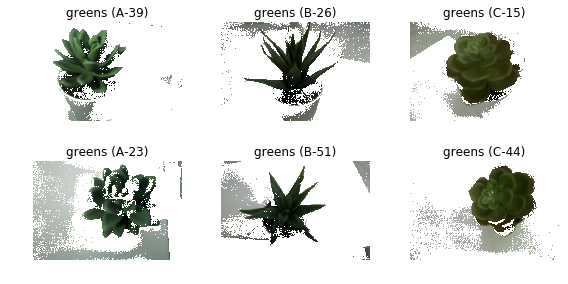

In [226]:
# #detect green in each image
# import cv2
# import numpy as np
# import imageio
# import matplotlib.pyplot as plt

# # read images from a file into a image object 
# im1 = imageio.imread('plantA_39.jpg')
# im2 = imageio.imread('plantB_26.jpg')
# im3 = imageio.imread('plantC_15.jpg')
# im4 = imageio.imread('plantA_23.jpg')
# im5 = imageio.imread('plantB_51.jpg')
# im6 = imageio.imread('plantC_44.jpg')

# # convert to hsv


# hsv1 = cv2.cvtColor(im1, cv2.COLOR_BGR2HSV_FULL)
# size1 = hsv1.shape
# test01 = (hsv1[:,:,0]>70)*(hsv1[:,:,0]<110)
# test001 = np.dstack((test01,test01,test01))
# test111 = np.logical_not(test001)
# img_2551 = np.ones(size1,dtype = 'uint8')* 255 
# imgg1 = im1 * test001 + img_2551 * test111

# hsv2 = cv2.cvtColor(im2, cv2.COLOR_BGR2HSV_FULL)
# size2 = hsv2.shape
# test02 = (hsv2[:,:,0]>70)*(hsv2[:,:,0]<120)
# test002 = np.dstack((test02,test02,test02))
# test112 = np.logical_not(test002)
# img_2552 = np.ones(size2,dtype = 'uint8')* 255
# imgg2 =  im2 * test002 + img_2552 * test112


# hsv3 = cv2.cvtColor(im3, cv2.COLOR_BGR2HSV_FULL)
# size3 = hsv3.shape
# test03 = (hsv3[:,:,0]>100)*(hsv3[:,:,0]<140)
# test003 = np.dstack((test03,test03,test03))
# test113 = np.logical_not(test003)
# img_2553 = np.ones(size3,dtype = 'uint8')* 255
# imgg3 =  im3 * test003 + img_2553 * test113

# hsv4 = cv2.cvtColor(im4, cv2.COLOR_BGR2HSV_FULL)
# size4 = hsv4.shape
# test04 = (hsv4[:,:,0]> 60)*(hsv4[:,:,0]< 95)
# test004 = np.dstack((test04,test04,test04))
# test114 = np.logical_not(test004)
# img_2554 = np.ones(size4,dtype = 'uint8')* 255
# imgg4 =  im4 * test004 + img_2554 * test114

# hsv5 = cv2.cvtColor(im5, cv2.COLOR_BGR2HSV_FULL)
# size5 = hsv5.shape
# test05 = (hsv5[:,:,0]>70)*(hsv5[:,:,0]<120)
# test005 = np.dstack((test05,test05,test05))
# test115 = np.logical_not(test005)
# img_2555 = np.ones(size5,dtype = 'uint8')* 255
# imgg5 =  im5 * test005 + img_2555 * test115

# hsv6 = cv2.cvtColor(im6, cv2.COLOR_BGR2HSV_FULL)
# size6 = hsv6.shape
# test06 = (hsv6[:,:,0]>100)*(hsv6[:,:,0]<140)
# test006 = np.dstack((test06,test06,test06))
# test116 = np.logical_not(test006)
# img_2556 = np.ones(size6,dtype = 'uint8')* 255
# imgg6 =  im6 * test006 + img_2556 * test116

# # #1，先把它转化为hsv。
# # #2，将(80，0，0)到(100，360，360)的数值设置为1，其他设置为0，只对hue 进行操作
# # #3，乘以原始图片，就得到原始图片显示一切细节。其他背景全部显示为白色。



# fig, axes = plt.subplots(2, 3, figsize=(8, 4))
# ax = axes.ravel()

# ax[0].imshow(imgg1)
# ax[0].axis('off'),ax[0].set_title('greens (A-39)')
# ax[1].imshow(imgg2)
# ax[1].axis('off'),ax[1].set_title('greens (B-26)')
# ax[2].imshow(imgg3)
# ax[2].axis('off'),ax[2].set_title('greens (C-15)')
# ax[3].imshow(imgg4)
# ax[3].axis('off'),ax[3].set_title('greens (A-23)')
# ax[4].imshow(imgg5)
# ax[4].axis('off'),ax[4].set_title('greens (B-51)')
# ax[5].imshow(imgg6)
# ax[5].axis('off'),ax[5].set_title('greens (C-44)')

# plt.savefig( 'greens.png' )
# fig.tight_layout()


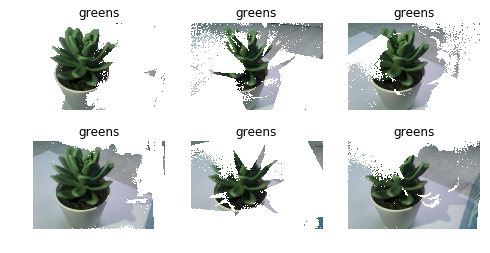

In [17]:
# #detect green in each image
# import cv2
# import numpy as np
# import imageio
# import matplotlib.pyplot as plt

# # read images from a file into a image object 
# im1 = imageio.imread('plantA_39.jpg')
# im2 = imageio.imread('plantB_26.jpg')
# im3 = imageio.imread('plantC_15.jpg')
# im4 = imageio.imread('plantA_23.jpg')
# im5 = imageio.imread('plantB_51.jpg')
# im6 = imageio.imread('plantC_44.jpg')
# im = [im1,im2,im3,im4,im5,im6]

# # convert to hsv

# fig, axes = plt.subplots(2, 3, figsize=(8, 4))
# ax = axes.ravel()

# for i in range(6):
#     hsv = cv2.cvtColor(im[i], cv2.COLOR_BGR2HSV_FULL)
#     size = hsv.shape
#     test0 = (hsv[:,:,0]>60)*(hsv[:,:,0]<140)
#     test00 = np.dstack((test0,test0,test0))
#     test11 = np.logical_not(test00)
#     img_255 = np.ones(size,dtype = 'uint8')* 255
#     img1 = im1 * test00
#     img2 = img_255 * test11
#     img = img1 + img2
#     ax[i].imshow(img)
#     ax[i].axis('off')
#     ax[i].set_title('greens')

# # #1，先把它转化为hsv。
# # #2，将(80，0，0)到(100，360，360)的数值设置为1，其他设置为0，只对hue 进行操作
# # #3，乘以原始图片，就得到原始图片显示一切细节。其他背景全部显示为白色。



In [11]:
# # detect green in each image
# import cv2
# import numpy as np

# ## convert to hsv
# hsv = cv2.cvtColor(im1, cv2.COLOR_BGR2HSV)

# ## mask of green (36,25,25) ~ (86, 255,255)
# # 对HSV一定范围 对目标进行提取

# mask = cv2.inRange(hsv, (36, 25, 25), (86, 255,255))
# # mask = cv2.inRange(hsv, (36, 25, 25), (70, 255,255))

# ## slice the green
# imask = mask > 0
# green = np.zeros_like(im1, np.uint8)
# green[imask] = im1[imask]
# # print im1[imask]



# ## save 
# cv2.imwrite("green.png", green)

True

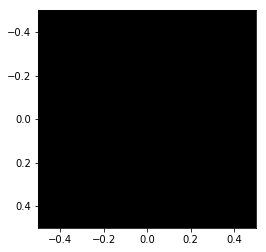

In [21]:
# ##### detect green in each image
# import skimage
# from skimage.color import rgb2hsv

# import numpy as np

# # convert to hsv
# img_hsv = rgb2hsv(im1)

# green_image = im1.copy() # Make a copy
# green_image[:,:,0] = 0
# green_image[:,:,2] = 0
# ---
# green_pixel = np.array([[[0, 255, 0]]], dtype=np.uint8)
# green_image = color.rgb2gray(green_pixel)
# ---

# # skimage.filters.thresholding.try_all_threshold(grayscale1)
# thresh = threshold_otsu(grayscale1)
# binary = grayscale1 > thresh

# #------------------ 
# predicted = np.uint8(binary) * 255

# #----------------
# RGB = np.zeros((binary.shape[0],binary.shape[1],3), dtype=np.uint8)
# # # Make True pixels white
# RGB[binary]  = [255,255,255]
# # # Make False pixels green
# RGB[~binary] = [0,255,0]
# #-------------------

# # plt.subplot(141),plt.imshow(img_hsv, cmap='gray'),
# # plt.axis('off'),plt.title('hsv')

# # plt.subplot(142),plt.imshow(RGB, cmap='gray'),
# # plt.axis('off'),plt.title('green channel')

# # plt.subplot(143),plt.imshow(predicted, cmap='gray'),
# # plt.axis('off'),plt.title('otsu predicted binary image')

# # plt.subplot(144),
# plt.imshow(green_image, cmap='gray'),

# plt.show()


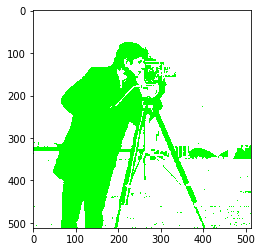

In [170]:
# from PIL import Image
# from skimage import data
# from skimage.filters import threshold_otsu

# # Load image
# image = data.camera()
# im1 = imageio.imread('plantA_39.jpg')
# # Threshold image to binary
# thresh = threshold_otsu(image)
# binary = image > thresh

# # Make 3 channel RGB image same dimensions
# RGB = np.zeros((binary.shape[0],binary.shape[1],3), dtype=np.uint8)

# # Make True pixels red
# RGB[binary]  = [255,255,255]
# # Make False pixels blue
# RGB[~binary] = [0,255,0]

# plt.imshow(RGB)
# plt.show()